Loading images...
Error loading https://drive.google.com/file/d/1lLCMLelpDyMoV2kwkwIOozRDwvEDTXgU/view?usp=drive_link: [Errno 2] No such file or directory: 'https://drive.google.com/file/d/1lLCMLelpDyMoV2kwkwIOozRDwvEDTXgU/view?usp=drive_link'

Total images loaded: 1

Applying and displaying augmentations...
Processing image 1/1


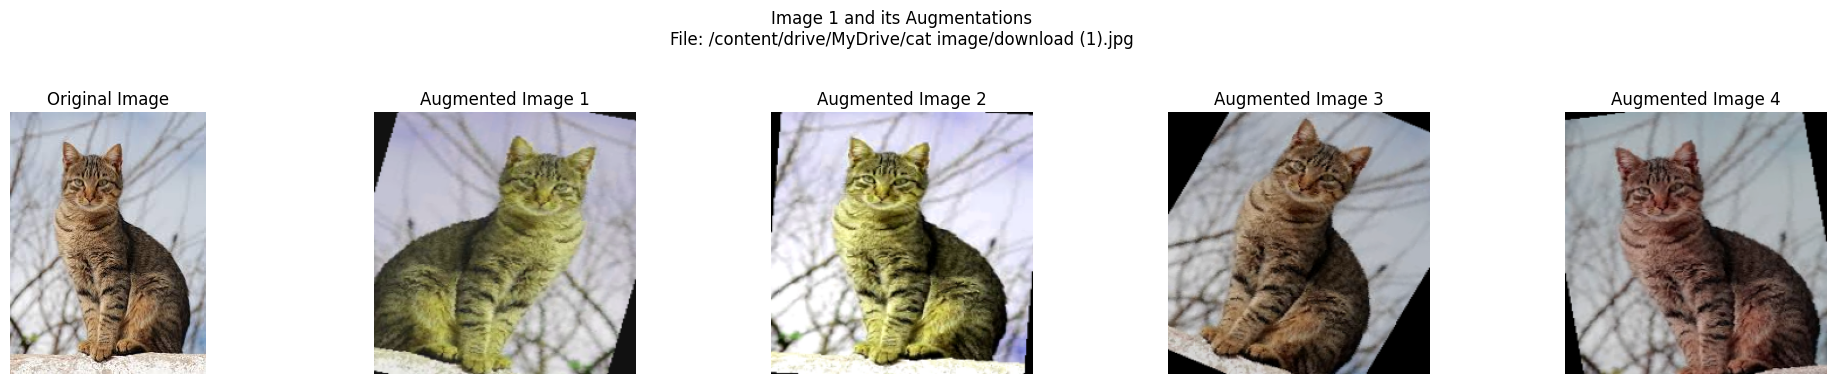


Augmentation display complete.


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. List of all image files (your "image links" - these are local file paths)
image_files = ['/content/drive/MyDrive/cat image/download (1).jpg',
''


]

# 2. Load all image files into a list of PIL Image objects
images = []
print("Loading images...")
for img_path in image_files:
    try:
        img = Image.open(img_path)
        images.append(img)
        # print(f"Loaded: {img_path}") # Uncomment to see individual load messages
    except Exception as e:
        print(f"Error loading {img_path}: {e}")

print(f"\nTotal images loaded: {len(images)}")

# 3. Define the transformation pipeline named 'display_transforms'
display_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.ToTensor(), # Convert PIL Image to PyTorch Tensor
    transforms.ToPILImage() # Convert Tensor back to PIL Image for display
])

print("\nApplying and displaying augmentations...")
# 4. Iterate through each PIL.Image object in the images list
for idx, original_img in enumerate(images):
    print(f"Processing image {idx+1}/{len(images)}")
    # Create a matplotlib figure and a grid of subplots
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    # Include the image file path in the title
    fig.suptitle(f'Image {idx+1} and its Augmentations\nFile: {image_files[idx]}', fontsize=12)

    # Display the original image in the first subplot
    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Apply the display_transforms to the original image four times
    augmented_images = []
    for i in range(4):
        transformed_img = display_transforms(original_img)
        augmented_images.append(transformed_img)

    # Display each of the four augmented images in the remaining subplots
    for i in range(4):
        axes[i+1].imshow(augmented_images[i])
        axes[i+1].set_title(f"Augmented Image {i+1}")
        axes[i+1].axis('off')

    # Adjust the layout of the plots for better visualization and display the figure
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

print("\nAugmentation display complete.")